In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [9]:
df= pd.read_csv("D:\\Tejas\\Data science road map\\git_Class\\5_Machine_learning\\3_Clustering\\income.csv")

In [11]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


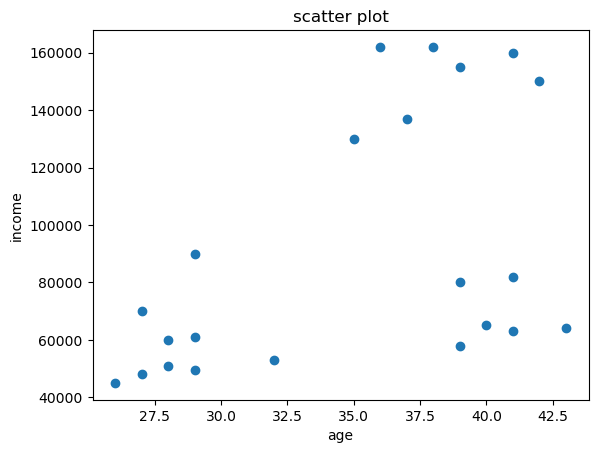

In [18]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel("age")
plt.ylabel("income")
plt.title("scatter plot")
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
df[["Age","Income"]]=scaler.fit_transform(df[['Age','Income']])

In [23]:
df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [30]:
model  = KMeans(n_clusters=3)

In [31]:
model.fit(df[["Age","Income"]])

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
df["cluster"] = model.predict(df[["Age","Income"]])

In [33]:
df["cluster"].unique()

array([0, 1, 2])

In [42]:
df0 = df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2 = df[df["cluster"]==2]

In [43]:
df0

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


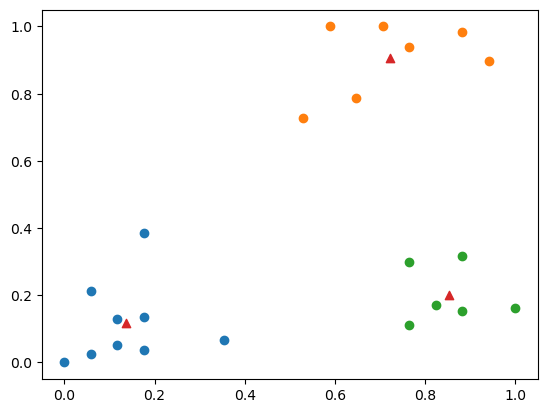

In [49]:
plt.scatter(df0["Age"], df0["Income"], label="income1")
plt.scatter(df1["Age"], df1["Income"], label="income1")
plt.scatter(df2["Age"], df2["Income"], label="income1")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1] , marker="^")
plt.show()

In [46]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.9047619 ],
       [0.85294118, 0.2022792 ]])

In [50]:
model.inertia_

0.4825922035230094

In [53]:
sse=[]
for i in range(1,11):
    model  = KMeans(n_clusters=i)
    model.fit(df[["Age","Income"]])
    sse.append(model.inertia_)
    

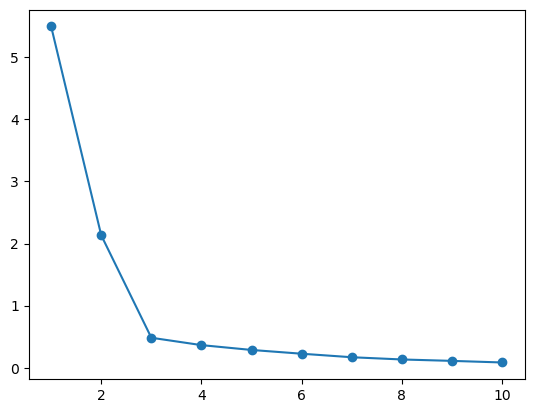

In [55]:
plt.plot(range(1,11), sse)
plt.scatter(range(1,11),sse)